In [640]:
# import libraries
import numpy as np # linear  algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('C:/Users/diran/Downloads/Machine Learning/Project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [641]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [642]:
# check missing Values!
df.isnull().sum().max()

0

In [643]:
# check column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [644]:
# obtain the percentages of the two levels of the class variable
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Histogram of class variable \n (0: No Fraud || 1: Fraud)')

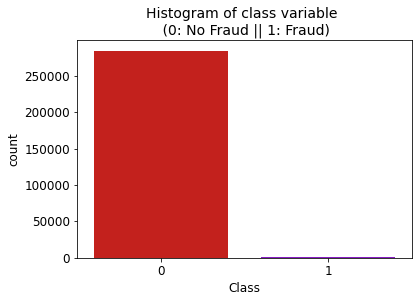

In [645]:
colors = ["#DF0601", "#9000DF"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Histogram of class variable \n (0: No Fraud || 1: Fraud)', fontsize=14)

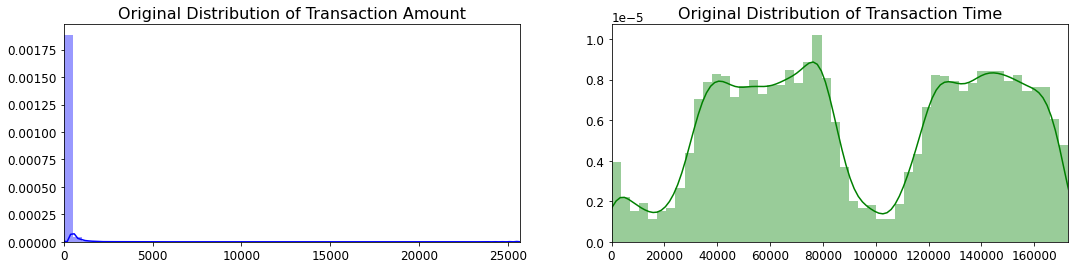

In [646]:
### FEARTURE ENGINEERING


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Original Distribution of Transaction Amount', fontsize=16)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Original Distribution of Transaction Time', fontsize=16)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

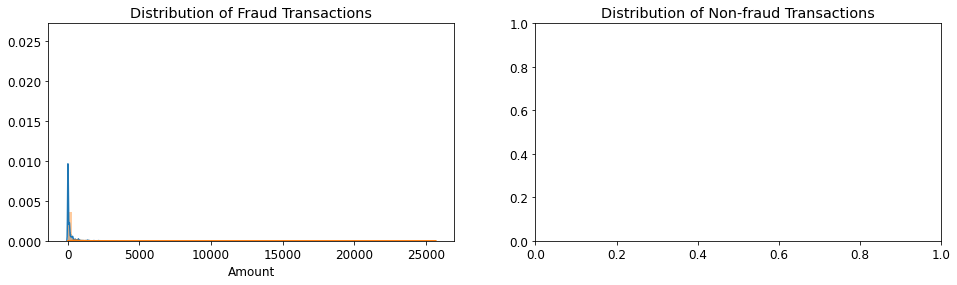

In [647]:
# Distribution of AMOUNT of Fraud vs non-fraud trasactions

fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[0])
axs[1].set_title("Distribution of Non-fraud Transactions")

plt.show()

In [648]:
# Investigate to know the exact fraud amounts and the distribution for each amount
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [649]:
# Investigate to know the exact non-fraud amounts and the distribution for each amount
print("Non-fraud Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min())

Non-fraud Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: Amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


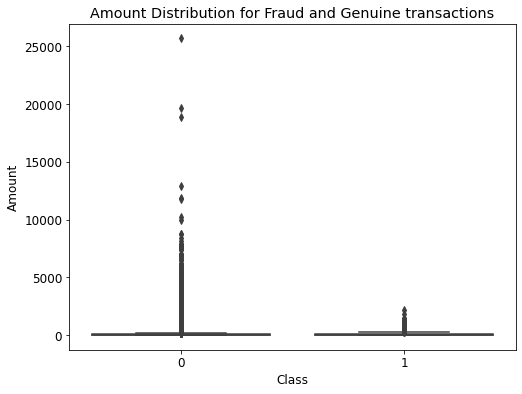

In [650]:
# Ditribution of the AMOUNT FEATURE variable w.r.t Class variable

plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

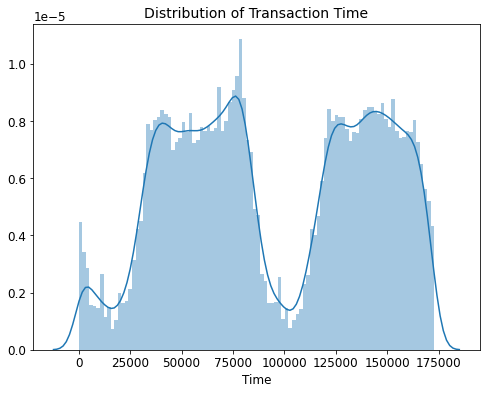

In [651]:
# Distribution of TIME feature variable

plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

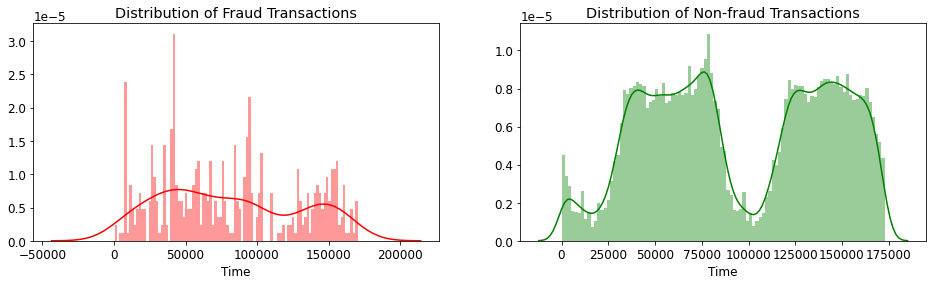

In [652]:
# Distribution of Time w.r.t Fraud/no-Fraud

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-fraud Transactions")

plt.show()

In [653]:
# Converting time from second to hour
df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

In [654]:
# Calculating hour of the day
import math
df['Hour'] = df['Time']%24   # 2 days of data
df['Hour'] = df['Hour'].apply(lambda x : math.floor(x))

In [655]:
# Calculating First and Second day
df['Day'] = df['Time']/24   # 2 days of data
df['Day'] = df['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [656]:
df[['Time','Hour','Day','Amount','Class']]

,Time,Hour,Day,Amount,Class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [657]:
# Number of Fraud vs Non-fraud transactions each DAY

# calculating fraud transaction daywise
dayFrdTran = df[(df['Class'] == 1)]['Day'].value_counts()

# calculating genuine transaction daywise
dayNonfrdTran = df[(df['Class'] == 0)]['Day'].value_counts()

# calculating total transaction daywise
dayTran = df['Day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of Non-fraud transactions Day wise:")
print(dayNonfrdTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    144787
2    140020
Name: Day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: Day, dtype: int64


No of Non-fraud transactions Day wise:
1    144506
2    139809
Name: Day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: Day, dtype: float64


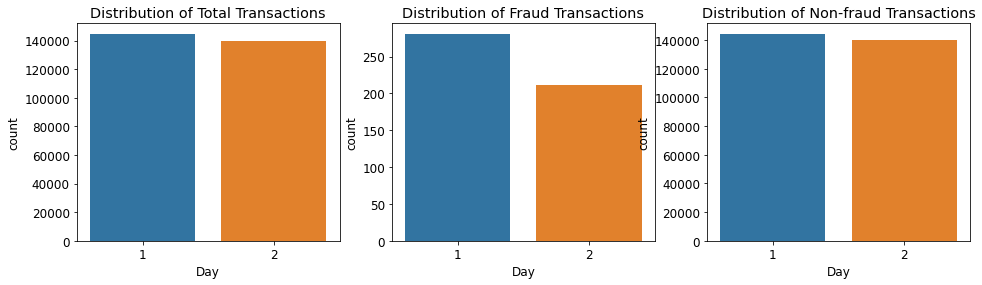

In [658]:
# Barchart showing Fraud vs Non-fraud transactions Day-wise

fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['Day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['Class'] == 1)]['Day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['Class'] == 0)]['Day'], ax=axs[2])
axs[2].set_title("Distribution of Non-fraud Transactions")

plt.show()

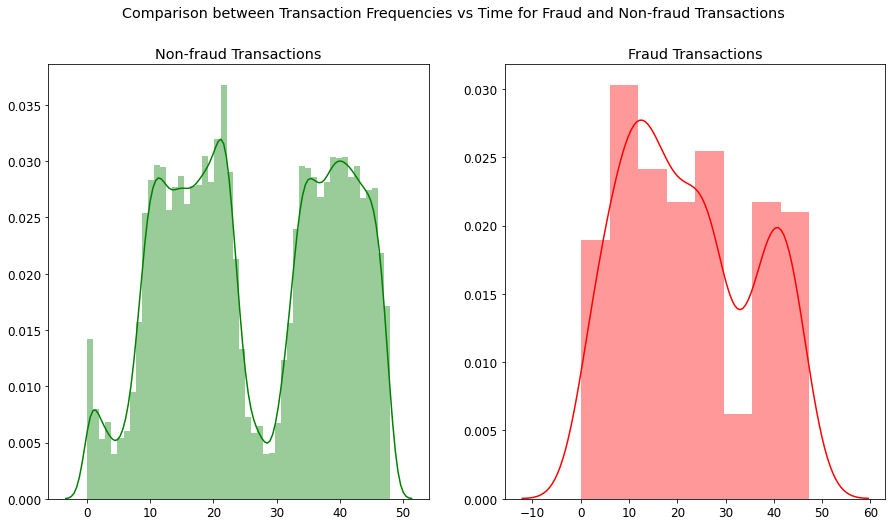

In [659]:
# Time plots Comparison Showing Transacrtion Frequencies vs Time of Fraud/Non-fraud
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(df[df['Class']==0]['Time'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Non-fraud Transactions')

sns.distplot(df[df['Class']==1]['Time'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Non-fraud Transactions')
plt.show()

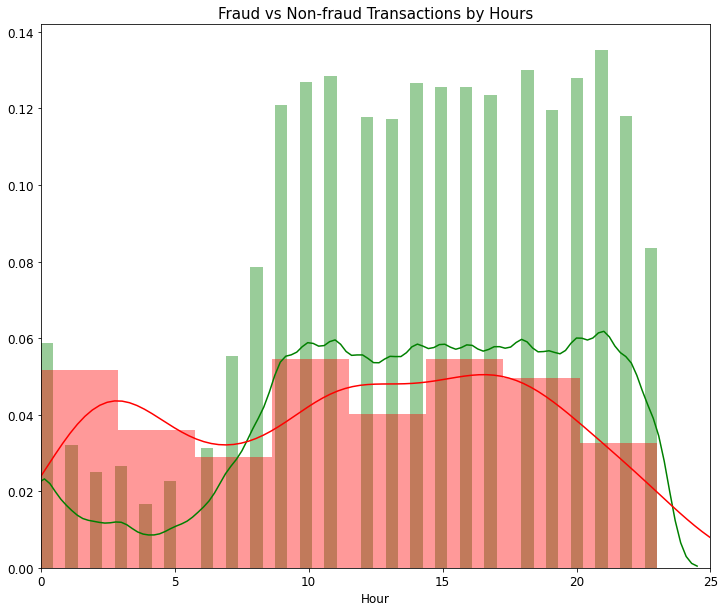

In [660]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Non-fraud Transactions

plt.figure(figsize=(12,10))

sns.distplot(df[df['Class'] == 0]["Hour"], color='green') # Non-fraud - green
sns.distplot(df[df['Class'] == 1]["Hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Non-fraud Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

In [661]:
##### SCALING THE TIME AND AMOUNT FEATURES

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['std_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['std_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.head()

df.drop(['Time','Amount'], axis=1, inplace=True)

In [662]:

std_amount = df['std_amount']
std_time = df['std_time']

df.drop(['std_amount', 'std_time'], axis=1, inplace=True)
df.insert(0, 'std_amount', std_amount)
df.insert(1, 'std_time', std_time)

# Amount and Time are Scaled!

df.head()

,std_amount,std_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Day
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,1
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,1
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,1
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,1
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,1


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

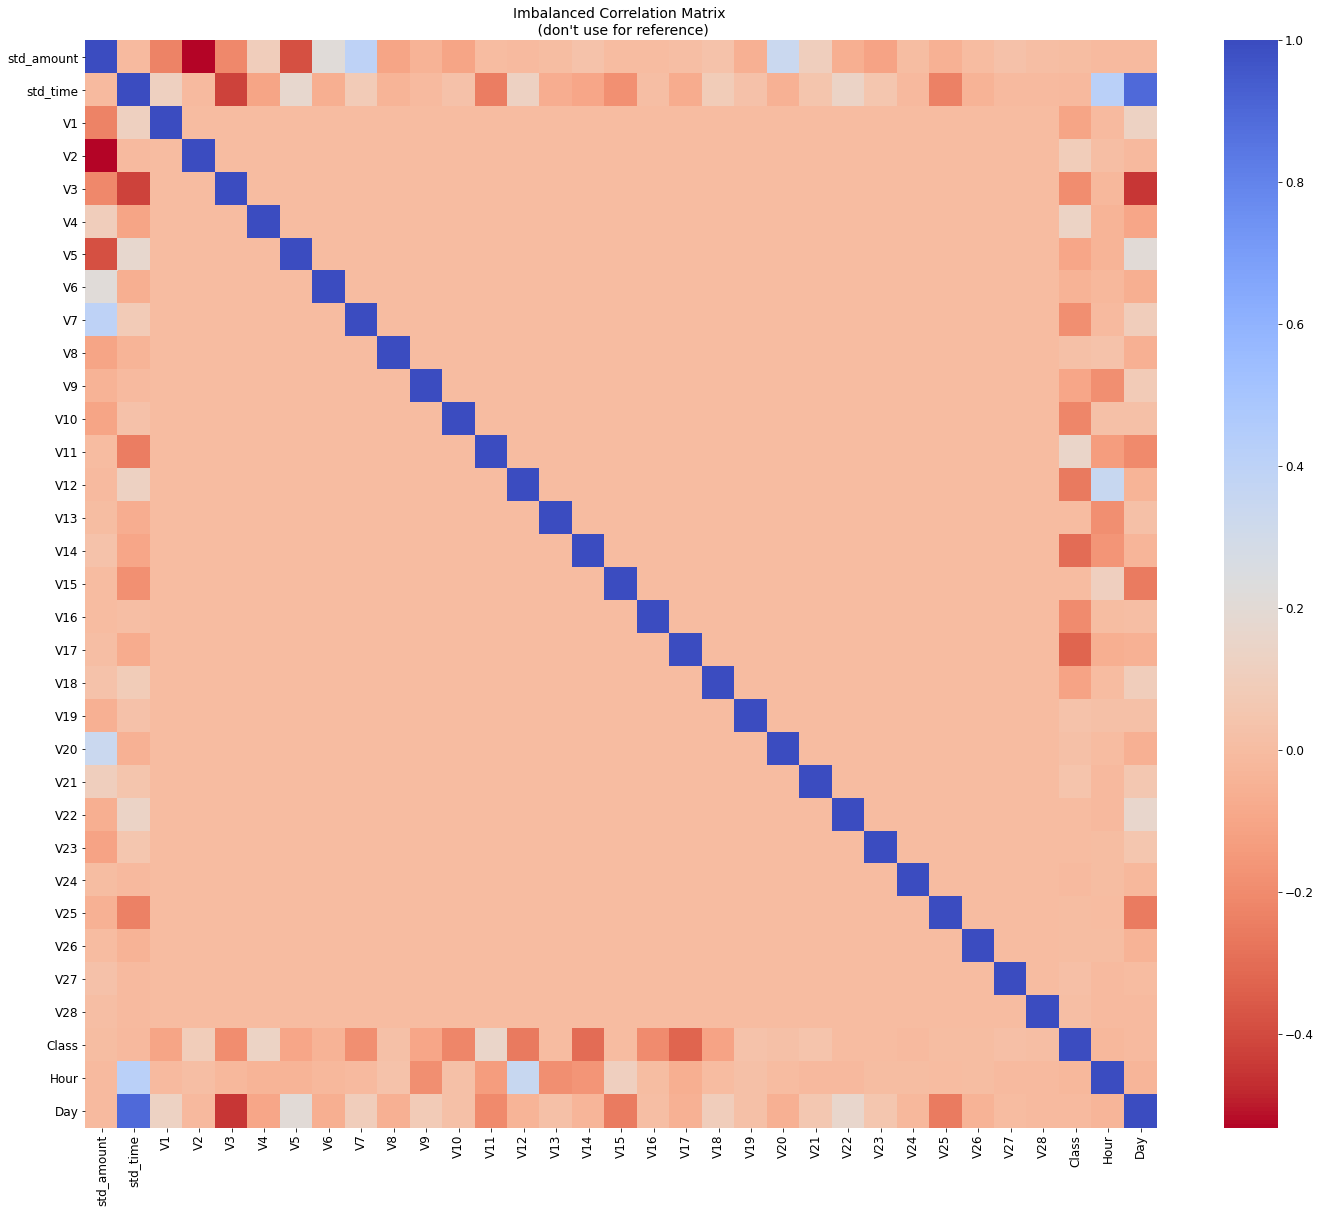

In [663]:
# CORRELATION OF VARIABLES

f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# correlation based on Entire DataFrame(imbalance dataset)
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


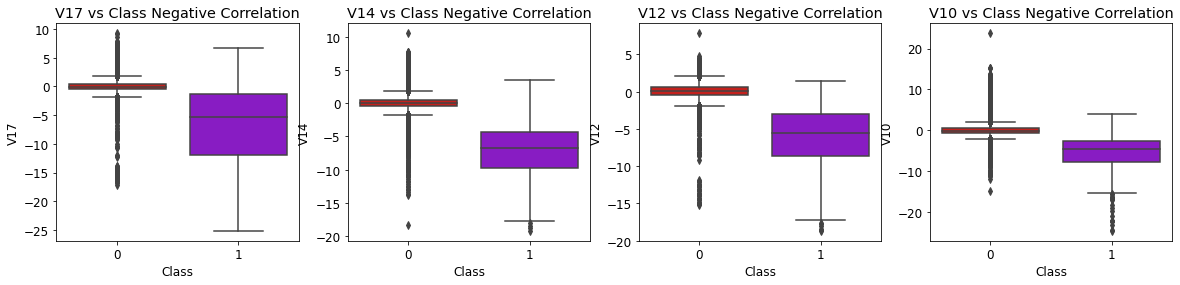

In [664]:
# Boxplots to gain more understanding of relationship between the class variable and features

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

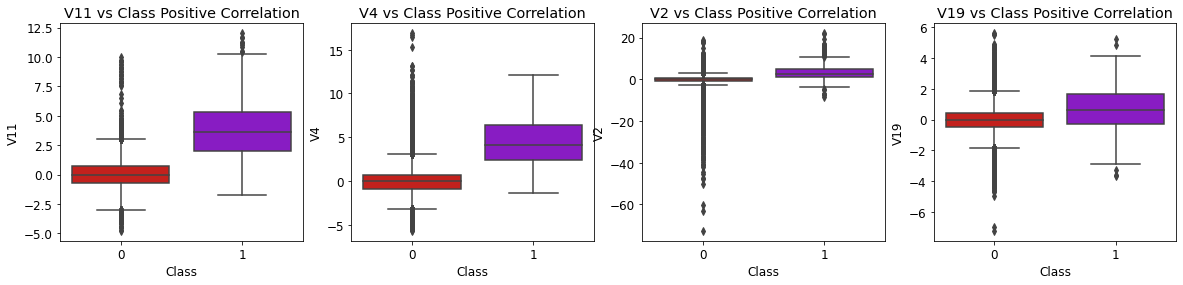

In [665]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

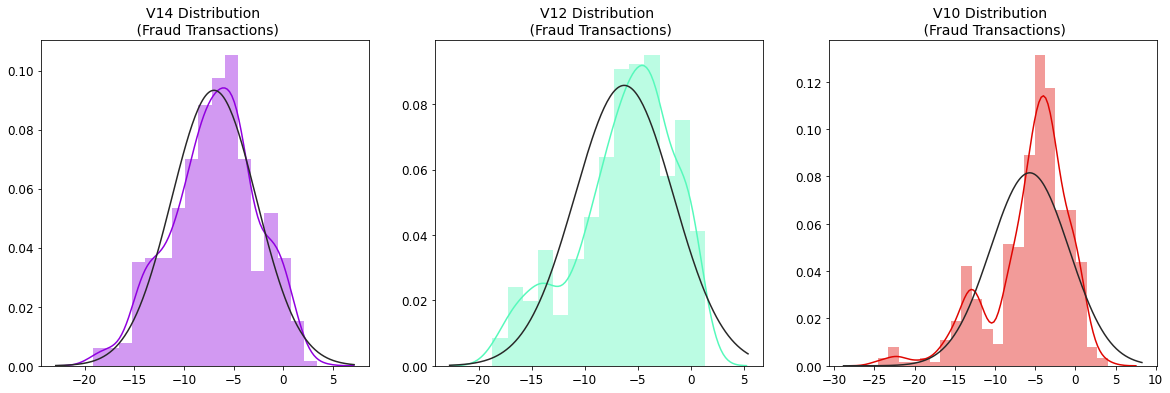

In [666]:
# Outlier Detection & Removal
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#9000DF')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#DF0601')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


In [667]:
# # Removing outliers from V14 variable that affect fraud transactions
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> Removing outliers from V12 variable that affect fraud transactions
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)


# Removing outliers from V10 variable that affect fraud transactions
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284506
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-15.1241628144946

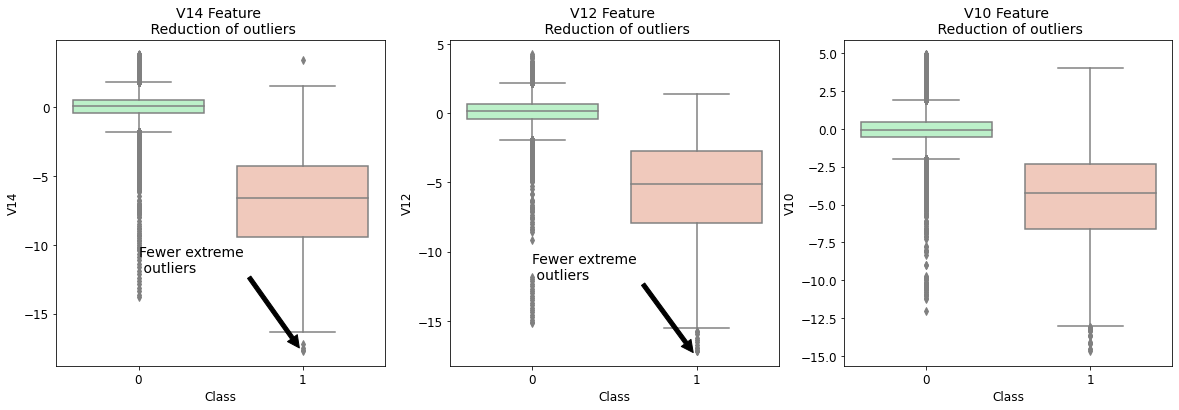

In [668]:
# Visualize feature variables with outliers removed

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [669]:
df.columns

Index(['std_amount', 'std_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Class', 'Hour', 'Day'],
      dtype='object')

In [670]:
# Separate Target Variable and Predictor Variables
# Here I am dropping the amount and scaled amount columns.
X = df.drop(['Class','Hour','Day'],axis=1)
y = df['Class']

In [671]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [672]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [673]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (198106, 30)
y_train -  (198106,)
X_test -  (84903, 30)
y_test -  (84903,)


In [674]:
# LOGISTIC  REGRESSION ON IMBALANCED DATASET

from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0) 


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [676]:
# Predict from test set

y_pred = logreg.predict(X_test)

In [677]:
# Model Evaluation

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84757
           1       0.84      0.54      0.66       146

    accuracy                           1.00     84903
   macro avg       0.92      0.77      0.83     84903
weighted avg       1.00      1.00      1.00     84903



In [678]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99903
AUC : 0.77046
Precision : 0.84043
Recall : 0.54110
F1 : 0.65833




In [679]:
# Predicted values counts for fraud and non-fraud of test dataset
pd.Series(y_pred).value_counts()

0    84809
1       94
dtype: int64

In [680]:
# Actual values counts for fraud and Non-fraud of test dataset
pd.Series(y_test).value_counts()

0    84757
1      146
Name: Class, dtype: int64

In [681]:
# so manually calculate Accuracy
94/146

0.6438356164383562

In [682]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[84742,    15],
       [   67,    79]], dtype=int64)

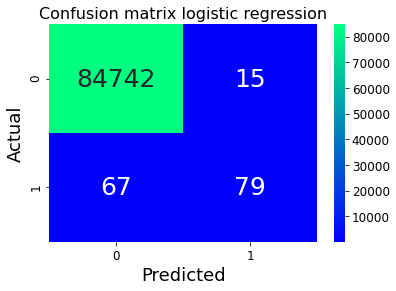

In [683]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix logistic regression', y=1.1, fontsize = 16)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Nonfraud', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Nonfraud', 'Fraud']);

plt.show()

In [684]:
# We already know that we have 146 fraud transaction in our test dataset, but our model predicted only 92 fraud transaction. 
# So the real accuracy of our model is 79/146 which in other words is the recall

79/146

0.541095890410959

In [685]:
# ROC Curve
metrics.roc_auc_score(y_test , y_pred)

0.7704594569390237

In [686]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99903
AUC : 0.77046
Precision : 0.84043
Recall : 0.54110
F1 : 0.65833


In [687]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99857251e-01, 1.42748969e-04],
       [9.99945405e-01, 5.45948760e-05],
       [9.99838150e-01, 1.61850396e-04],
       ...,
       [9.99920231e-01, 7.97691939e-05],
       [9.99918973e-01, 8.10269045e-05],
       [9.99335553e-01, 6.64447439e-04]])

AUC -  0.7704594569390237 



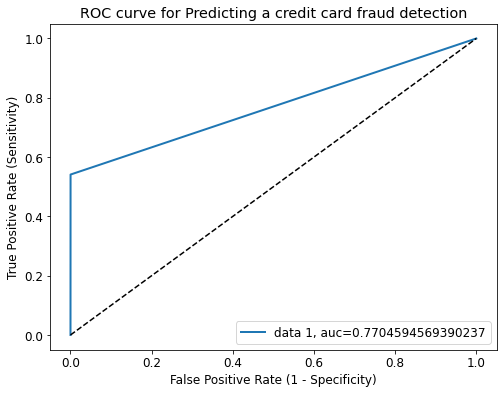

In [688]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [689]:
# TECHNIQUES TO DEAL WITH IMBALANCED DATASETS

# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [690]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [691]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,std_amount,std_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Day
17480,1.089779,-0.657162,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,...,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1,7,1
31602,7.328722,-0.566994,0.465780,-2.562041,-0.492950,-0.963769,-1.639340,-0.605721,0.046533,-0.325919,...,-1.504393,-0.224154,0.010662,-0.047855,-0.556747,-0.076701,0.107911,0,10,1
144368,0.122686,0.016166,1.034179,0.013946,0.369420,1.249343,0.046226,0.617291,-0.105235,0.284083,...,0.135484,-0.059536,-0.273684,0.539455,-0.301979,0.046458,0.005701,0,23,1
188969,2.134563,0.511319,1.702986,-0.493608,-1.401283,0.650351,-0.331675,-1.151494,0.167688,-0.313756,...,-0.228839,0.068595,-0.002522,-0.322222,0.493489,-0.075194,0.000016,0,11,2
57885,-0.287710,-0.429622,1.232744,0.803851,0.135898,2.479655,0.257033,-0.834634,0.606711,-0.318566,...,-0.010970,-0.110464,0.400998,0.751004,0.066847,-0.035355,0.011070,0,13,1


In [692]:
# Undersampling 
X_under = new_df.drop(['Class','Hour','Day'], axis=1)
y_under = new_df['Class']

In [693]:
#print('Original dataset shape %s' % Counter(y))

#rus = RandomUnderSampler(random_state=42)
#X_res, y_res = rus.fit_resample(X, y)

#print('Resampled dataset shape %s' % Counter(y_res))

In [694]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, shuffle=True, random_state=42)

print("")
print("Number transactions train dataset: ", len(X_train_under))
print("Number transactions test dataset: ", len(X_test_under))
print("Total number of transactions: ", len(X_train_under)+len(X_test_under))


Number transactions train dataset:  664
Number transactions test dataset:  285
Total number of transactions:  949


In [695]:
# Turn the values into an array for feeding the classification algorithms.
X_train_under = X_train_under.values
X_test_under = X_test_under.values
y_train_under = y_train_under.values
y_test_under = y_test_under.values


In [696]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}

In [697]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_under, y_train_under)
    training_score = cross_val_score(classifier, X_train_under, y_train_under, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score


In [698]:
# We use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression Classifier
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_under, y_train_under)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# K Nearest Neighbour Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_under, y_train_under)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_under, y_train_under)
# SVC best estimator
svc = grid_svc.best_estimator_

In [699]:
# Cross validation scores

log_reg_score = cross_val_score(log_reg, X_train_under, y_train_under, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train_under, y_train_under, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train_under, y_train_under, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.52%
Knears Neighbors Cross Validation Score 93.37%
Support Vector Classifier Cross Validation Score 93.52%


In [700]:
# Let's Plot Learning Curves for the 3 classifiers

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,10), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    
    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    
    # Third Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    

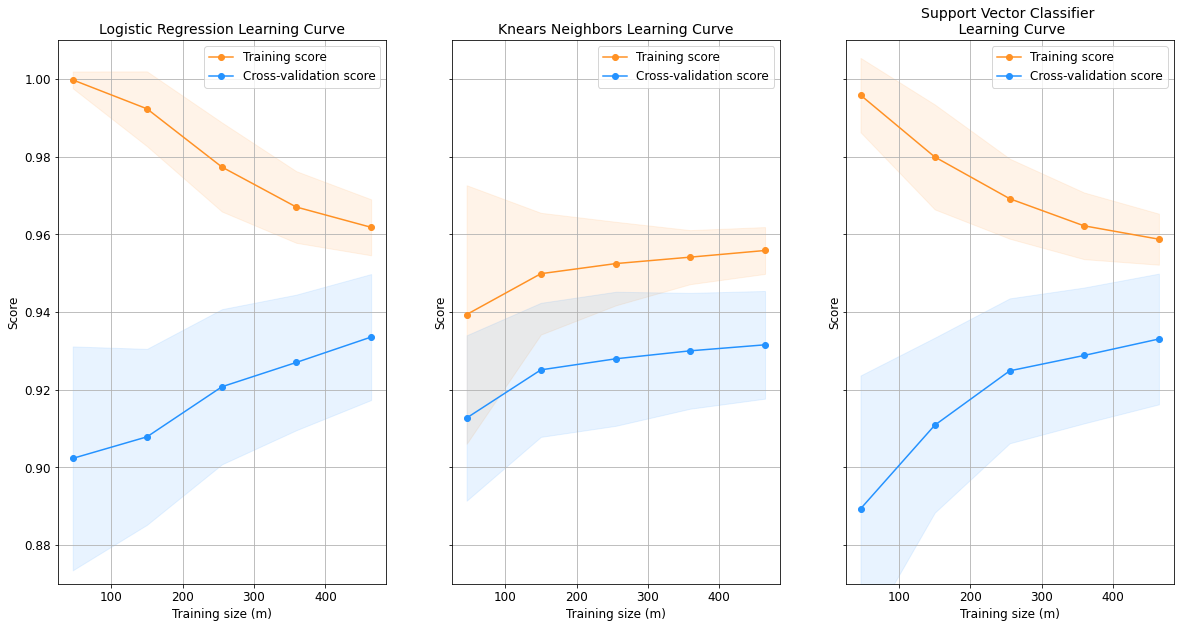

In [701]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, X_train_under, y_train_under, (0.87, 1.01), cv=cv, n_jobs=3)

In [719]:
# Logistic prediction on X_test
y_pred = log_reg.predict(X_test_under)

In [720]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test_under))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test_under , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test_under , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test_under , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred)))

Accuracy :0.94737
AUC : 0.94865
Precision : 0.97222
Recall : 0.92715
F1 : 0.94915


AUC -  0.948650785806069 



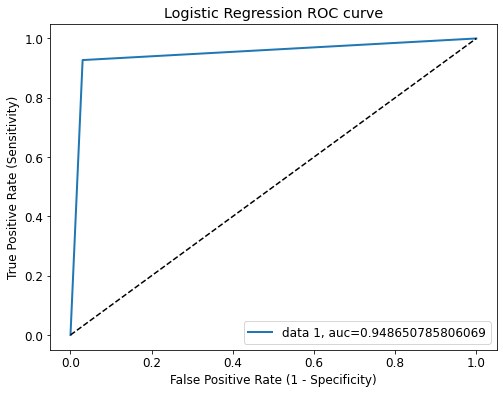

In [721]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test_under, y_pred)

auc = metrics.roc_auc_score(y_test_under, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

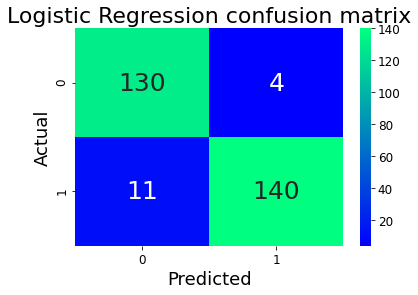

In [722]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test_under , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Logistic Regression confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [723]:
# K-Nearest neighbour prediction on X_test
y_pred = knears_neighbors.predict(X_test_under)

In [724]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test_under))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test_under , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test_under , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test_under , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred)))

Accuracy :0.91930
AUC : 0.92174
Precision : 0.96377
Recall : 0.88079
F1 : 0.92042


AUC -  0.921740634575467 



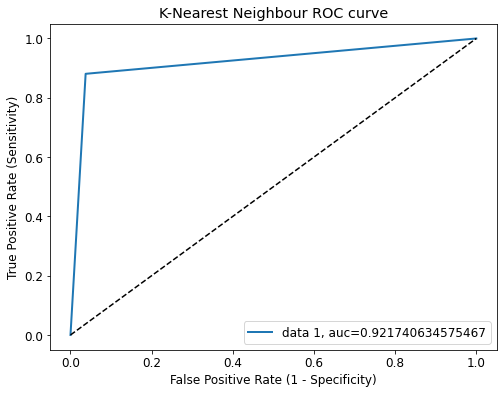

In [725]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test_under, y_pred)

auc = metrics.roc_auc_score(y_test_under, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('K-Nearest Neighbour ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

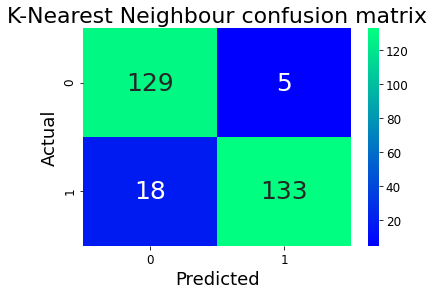

In [726]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test_under , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('K-Nearest Neighbour confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Non-fraud', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Non-fraud', 'Fraud']);

plt.show()

In [727]:
# Support vector machines prediction on X_test
y_pred = svc.predict(X_test_under)

In [728]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test_under))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test_under , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test_under , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test_under , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred)))

Accuracy :0.93684
AUC : 0.93914
Precision : 0.97842
Recall : 0.90066
F1 : 0.93793


AUC -  0.9391370959770684 



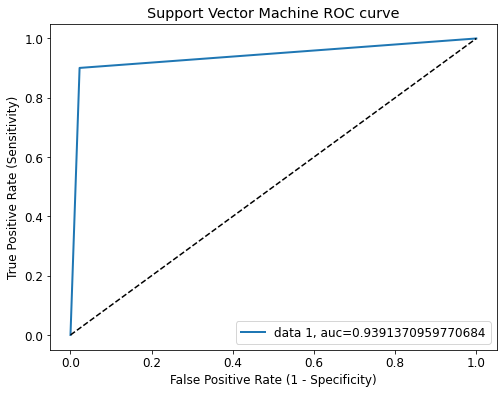

In [729]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test_under, y_pred)

auc = metrics.roc_auc_score(y_test_under, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('Support Vector Machine ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

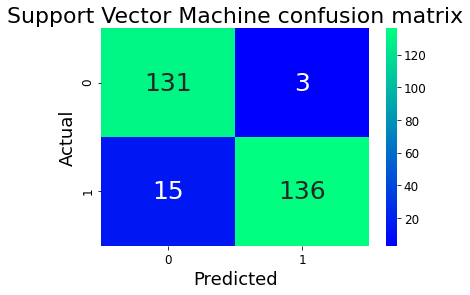

In [730]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test_under , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Support Vector Machine confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [731]:
# OVERSAMPLING TECHNIQUE (SMOTE METHOD)

from imblearn.over_sampling import SMOTE

In [732]:
df.head()

,std_amount,std_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Day
272480,0.679802,0.944771,2.208705,-1.656263,-1.301101,-1.876877,-0.756110,0.460414,-1.296391,0.082043,...,-0.077794,0.110711,-0.381303,-0.168297,-0.167577,0.002584,-0.051401,0,21,2
33971,6.640397,-0.554917,0.130150,-2.067789,0.576232,0.599483,-1.279070,1.074890,-0.292058,0.389678,...,-0.372028,-0.295860,-0.206633,-0.235906,0.902306,-0.097985,0.082127,0,10,1
259736,-0.055893,0.875915,-2.773338,-0.448975,1.575563,-0.536656,0.471079,-0.956096,0.186540,0.084211,...,-0.326680,0.825762,0.003015,0.484734,0.431111,-0.179738,-0.188999,0,20,2
75612,2.905890,-0.335248,-0.681854,-0.247901,1.019150,-0.253160,-0.653038,0.288724,1.310767,-0.341813,...,-1.227847,0.570396,-0.046126,-0.754456,0.149283,-0.060884,-0.151924,0,15,1
96454,-0.195766,-0.222254,-0.663214,1.199141,1.456688,-0.080417,-0.086426,-0.913008,0.713641,-0.071381,...,-0.598495,-0.006621,0.363830,-0.131162,0.075334,0.371379,0.188413,0,18,1


In [733]:
X = df.drop(['Class','Hour','Day'],axis=1)
y = df['Class']

In [734]:
print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 282552, 1: 457})
Resampled dataset shape Counter({0: 282552, 1: 282552})


In [735]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, shuffle=True, random_state=42)

print("")
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))



Number transactions train dataset:  395572
Number transactions test dataset:  169532
Total number of transactions:  565104


In [736]:
## Logistic Regression on SMOTE Oversampled Data
#logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)

In [737]:
#print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
#print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
#print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
#print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
#print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94632
AUC : 0.94639
Precision : 0.97338
Recall : 0.91799
F1 : 0.94488


AUC -  0.9463871284722662 



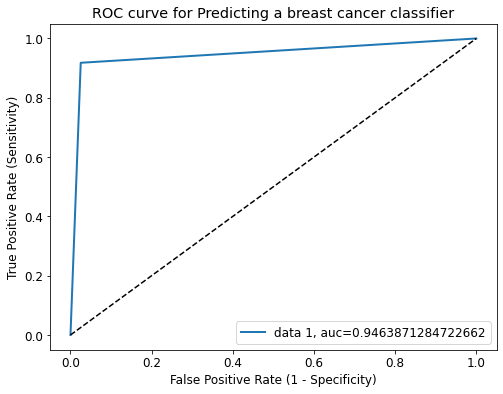

In [738]:
## plot ROC Curve

#plt.figure(figsize=(8,6))

#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

#auc = metrics.roc_auc_score(y_test, y_pred)
#print("AUC - ",auc,"\n")

#plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
#plt.legend(loc=4)

#plt.plot([0,1], [0,1], 'k--' )

#plt.rcParams['font.size'] = 12
#plt.title('ROC curve for Predicting a breast cancer classifier')
#plt.xlabel('False Positive Rate (1 - Specificity)')
#plt.ylabel('True Positive Rate (Sensitivity)')

#plt.show()

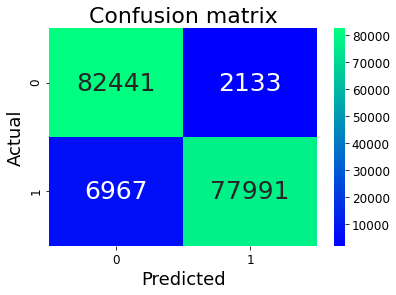

In [739]:
## Heatmap for Confusion Matrix

#cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

#plt.title('Confusion matrix', y=1.1, fontsize = 22)
#plt.xlabel('Predicted',fontsize = 18)
#plt.ylabel('Actual',fontsize = 18)

## ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
## ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

#plt.show()

In [740]:
# BUILD THREE CLASSIFIER MODELS USING A LOOP ON  SMOTE OVERSAMPLE DATASETS

In [741]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [742]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, shuffle=True, random_state=0)
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

Model Name : LR Undersampling
Train Accuracy :0.95633
Test Accuracy :0.92632
Train AUC : 0.95433
Test AUC : 0.92722
Train Precision : 0.98288
Test Precision : 0.96296
Train Recall : 0.92283
Test Recall : 0.89041
Train F1 : 0.95191
Test F1 : 0.92527
Confusion Matrix : 
 [[134   5]
 [ 16 130]]


Model Name : LR SMOTE
Train Accuracy :0.94616
Test Accuracy :0.94576
Train AUC : 0.94614
Test AUC : 0.94582
Train Precision : 0.97269
Test Precision : 0.97329
Train Recall : 0.91799
Test Recall : 0.91692
Train F1 : 0.94455
Test F1 : 0.94427
Confusion Matrix : 
 [[82435  2138]
 [ 7058 77901]]




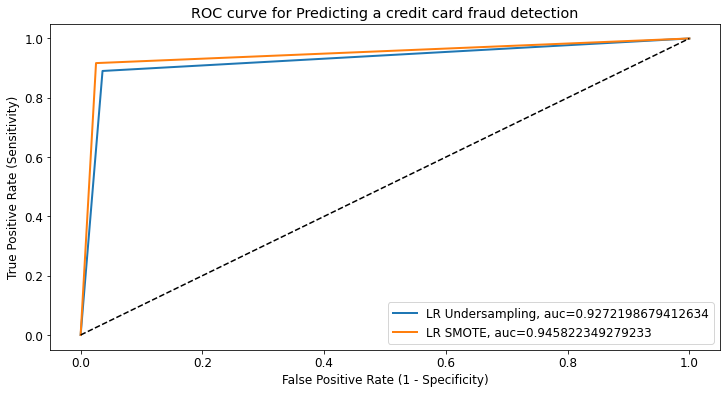

In [743]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(LRmodels)



Model Name : KNN Undersampling
Train Accuracy :0.94880
Test Accuracy :0.92632
Train AUC : 0.94610
Test AUC : 0.92756
Train Precision : 0.98596
Test Precision : 0.97710
Train Recall : 0.90354
Test Recall : 0.87671
Train F1 : 0.94295
Test F1 : 0.92419
Confusion Matrix : 
 [[136   3]
 [ 18 128]]


Model Name : KNN SMOTE
Train Accuracy :0.99921
Test Accuracy :0.99866
Train AUC : 0.99921
Test AUC : 0.99865
Train Precision : 0.99842
Test Precision : 0.99732
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.99921
Test F1 : 0.99866
Confusion Matrix : 
 [[84345   228]
 [    0 84959]]




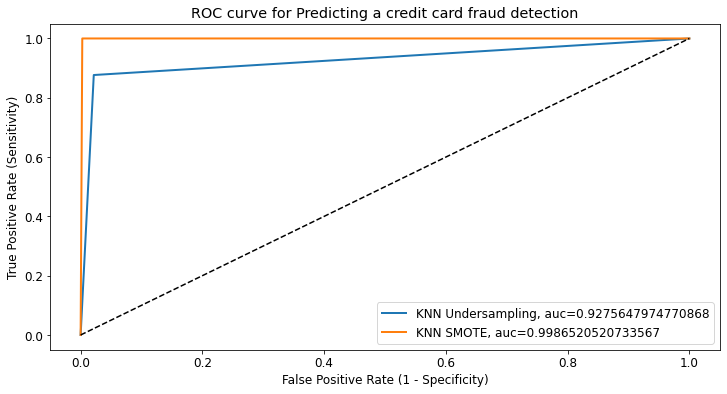

In [744]:
# #------------------ K-Nearest Neighbors (KNN) ------------------#
KNNmodels = []

KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_under,y_under))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

Model Name : SVM Undersampling
Train Accuracy :0.96536
Test Accuracy :0.89825
Train AUC : 0.96341
Test AUC : 0.89879
Train Precision : 0.99315
Test Precision : 0.92086
Train Recall : 0.93248
Test Recall : 0.87671
Train F1 : 0.96186
Test F1 : 0.89825
Confusion Matrix : 
 [[128  11]
 [ 18 128]]


Model Name : SVM SMOTE
Train Accuracy :0.99896
Test Accuracy :0.99873
Train AUC : 0.99896
Test AUC : 0.99872
Train Precision : 0.99796
Test Precision : 0.99748
Train Recall : 0.99997
Test Recall : 0.99999
Train F1 : 0.99896
Test F1 : 0.99873
Confusion Matrix : 
 [[84358   215]
 [    1 84958]]




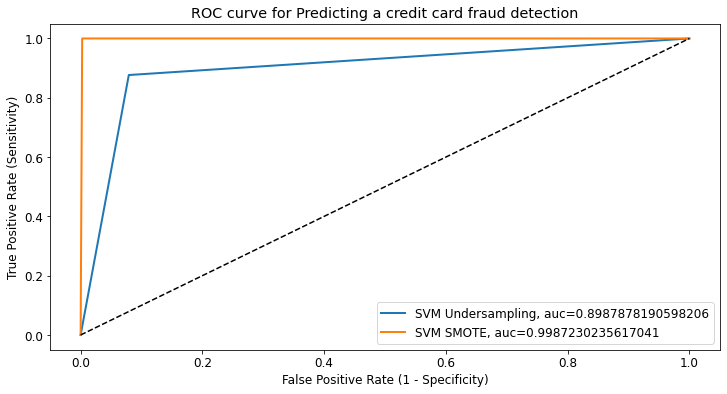

In [745]:
# #------------------ Support Vector Machines (SVM) ------------------#
SVMmodels = []

SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_under,y_under))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

In [746]:
# NEURAL NETWORK TESTING RANDOM UnderSampling Data:

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train_under.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(2, activation='softmax')
])

In [747]:
undersample_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [748]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [749]:
undersample_model.fit(X_train_under, y_train_under, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
22/22 - 0s - loss: 1.0225 - accuracy: 0.4520 - val_loss: 0.7583 - val_accuracy: 0.4962
Epoch 2/20
22/22 - 0s - loss: 0.7158 - accuracy: 0.5235 - val_loss: 0.6408 - val_accuracy: 0.8195
Epoch 3/20
22/22 - 0s - loss: 0.6076 - accuracy: 0.8719 - val_loss: 0.5759 - val_accuracy: 0.8571
Epoch 4/20
22/22 - 0s - loss: 0.5373 - accuracy: 0.8964 - val_loss: 0.5108 - val_accuracy: 0.8647
Epoch 5/20
22/22 - 0s - loss: 0.4709 - accuracy: 0.9040 - val_loss: 0.4485 - val_accuracy: 0.8947
Epoch 6/20
22/22 - 0s - loss: 0.4113 - accuracy: 0.9096 - val_loss: 0.3982 - val_accuracy: 0.8947
Epoch 7/20
22/22 - 0s - loss: 0.3591 - accuracy: 0.9153 - val_loss: 0.3512 - val_accuracy: 0.9173
Epoch 8/20
22/22 - 0s - loss: 0.3151 - accuracy: 0.9266 - val_loss: 0.3125 - val_accuracy: 0.9248
Epoch 9/20
22/22 - 0s - loss: 0.2783 - accuracy: 0.9322 - val_loss: 0.2832 - val_accuracy: 0.9323
Epoch 10/20
22/22 - 0s - loss: 0.2488 - accuracy: 0.9397 - val_loss: 0.2614 - val_accuracy: 0.9248
Epoch 11/20
22/22 -

In [750]:
undersample_predictions = undersample_model.predict(X_test_under, batch_size=200, verbose=0)

In [751]:
undersample_fraud_predictions = undersample_model.predict_classes(X_test_under, batch_size=200, verbose=0)

In [752]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[131   3]
 [ 19 132]]
Confusion matrix, without normalization
[[134   0]
 [  0 151]]


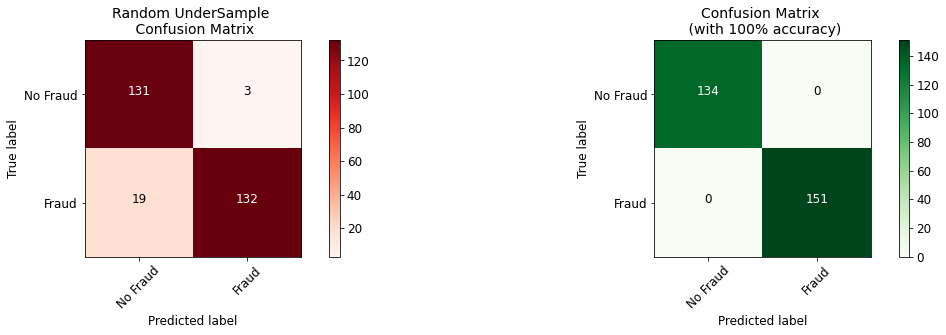

In [753]:
from sklearn.metrics import confusion_matrix
undersample_cm = confusion_matrix(y_test_under, undersample_fraud_predictions)
actual_cm = confusion_matrix(y_test_under, y_test_under)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [779]:
# Keras || OverSampling (SMOTE):

n_inputs = X_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(2, activation='softmax')
])

In [780]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [781]:
oversample_model.fit(X_train, y_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1055/1055 - 2s - loss: 0.1526 - accuracy: 0.9432 - val_loss: 0.0982 - val_accuracy: 0.9600
Epoch 2/20
1055/1055 - 1s - loss: 0.0830 - accuracy: 0.9676 - val_loss: 0.0666 - val_accuracy: 0.9752
Epoch 3/20
1055/1055 - 1s - loss: 0.0502 - accuracy: 0.9822 - val_loss: 0.0377 - val_accuracy: 0.9877
Epoch 4/20
1055/1055 - 1s - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0245 - val_accuracy: 0.9928
Epoch 5/20
1055/1055 - 1s - loss: 0.0203 - accuracy: 0.9948 - val_loss: 0.0182 - val_accuracy: 0.9953
Epoch 6/20
1055/1055 - 1s - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.0141 - val_accuracy: 0.9967
Epoch 7/20
1055/1055 - 1s - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.0122 - val_accuracy: 0.9976
Epoch 8/20
1055/1055 - 1s - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.0104 - val_accuracy: 0.9980
Epoch 9/20
1055/1055 - 1s - loss: 0.0096 - accuracy: 0.9983 - val_loss: 0.0089 - val_accuracy: 0.9985
Epoch 10/20
1055/1055 - 1s - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.0082 - 

In [782]:
oversample_predictions = oversample_model.predict(X_test, batch_size=200, verbose=0)

In [783]:
oversample_fraud_predictions = oversample_model.predict_classes(X_test, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[84423   151]
 [    0 84958]]
Confusion matrix, without normalization
[[84574     0]
 [    0 84958]]


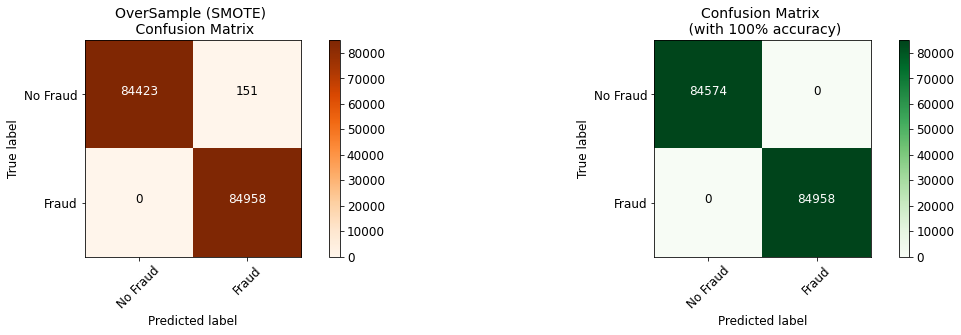

In [784]:
oversample_smote = confusion_matrix(y_test, oversample_fraud_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)